# Zillow Clustering

In [27]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

import wrangle_zillow as wr

## Acquire

In [2]:
df = wr.get_zillow_data()

In [3]:
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77576,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2.0,560.0,NaN,NaN,34300140.0,-118706327.0,

## Prepare

In [4]:
imputer, train, validate, test = wr.prep_zillow(df)
train

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
37938,10814808,3.0,3.0,8.0,3.0,2516.0,6037.0,3.0,34144966.0,-118563158.0,13841.0,0101,6.037140e+07,12447.0,3101.0,96379.0,0.0,1.0,1969.0,293159.0,991005.0,2016.0,697846.0,12215.82,6.037140e+13,-0.014433,2017-05-19,Central,Single Family Residential
37208,12926569,1.0,3.0,4.0,1.0,952.0,6037.0,1.0,34091482.0,-117927622.0,6974.0,0100,6.037405e+07,24245.0,3101.0,96473.0,0.0,1.0,1953.0,59739.0,298700.0,2016.0,238961.0,3859.24,6.037405e+13,0.009168,2017-05-17,Floor/Wall,Single Family Residential
23809,11324399,3.0,4.0,7.0,3.0,2586.0,6037.0,3.0,34562634.0,-118170666.0,9644.0,0100,6.037910e+07,40227.0,3101.0,97329.0,0.0,1.0,2005.0,254300.0,328000.0,2016.0,73700.0,6829.19,6.037910e+13,-0.000700,2017-04-05,Central,Single Family Residential
16125,14101296,2.0,3.0,6.0,2.0,1200.0,6059.0,2.0,33777955.0,-117901813.0,8772.0,122,6.059076e+07,24832.0,1286.0,97047.0,7.0,1.0,1969.0,99555.0,254452.0,2016.0,154897.0,3258.04,6.059076e+13,0.148999,2017-03-10,None,Single Family Residential
63332,11654520,5.0,5.0,11.0,5.0,4790.0,6037.0,5.0,34130246.0,-118429826.0,19133.0,0101,6.037261e+07,12447.0,3101.0,96086.0,0.0,1.0,1978.0,477777.0,1003959.0,2016.0,526182.0,12495.94,6.037261e+13,-0.041620,2017-08-02,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77511,12852914,4.0,5.0,7.0,4.0,3018.0,6037.0,4.0,34061717.0,-117859278.0,44800.0,0100,6.037404e+07,24245.0,3101.0,96475.0,0.0,1.0,1966.0,300788.0,449152.0,2016.0,148364.0,5538.96,6.037404e+13,0.035977,2017-09-19,Central,Single Family Residential
73401,12962922,2.0,2.0,4.0,2.0,1163.0,6037.0,2.0,34113435.0,-118006324.0,5324.0,0100,6.037431e+07,50749.0,3101.0,96267.0,0.0,1.0,1948.0,39367.0,68989.0,2016.0,29622.0,1183.21,6.037431e+13,-0.095149,2017-09-01,Floor/Wall,Single Family Residential
36378,11216321,3.0,3.0,8.0,3.0,2124.0,6037.0,3.0,34574332.0,-118015394.0,7859.0,0100,6.037911e+07,40227.0,3101.0,97330.0,0.0,1.0,2007.0,190867.0,238583.0,2016.0,47716.0,4801.22,6.037911e+13,0.016197,2017-05-16,Central,Single Family Residential
22419,11005840,2.0,4.0,8.0,2.0,1779.0,6037.0,2.0,34237380.0,-118267407.0,8224.0,0100,6.037101e+07,12447.0,3101.0,96330.0,0.0,1.0,1965.0,208047.0,598134.0,2016.0,390087.0,7299.06,6.037101e+13,-0.116583,2017-03-31,Central,Single Family Residential


In [5]:
imputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [6]:
train.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

In [7]:
validate.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

In [8]:
test.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

## Explore

#### 1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

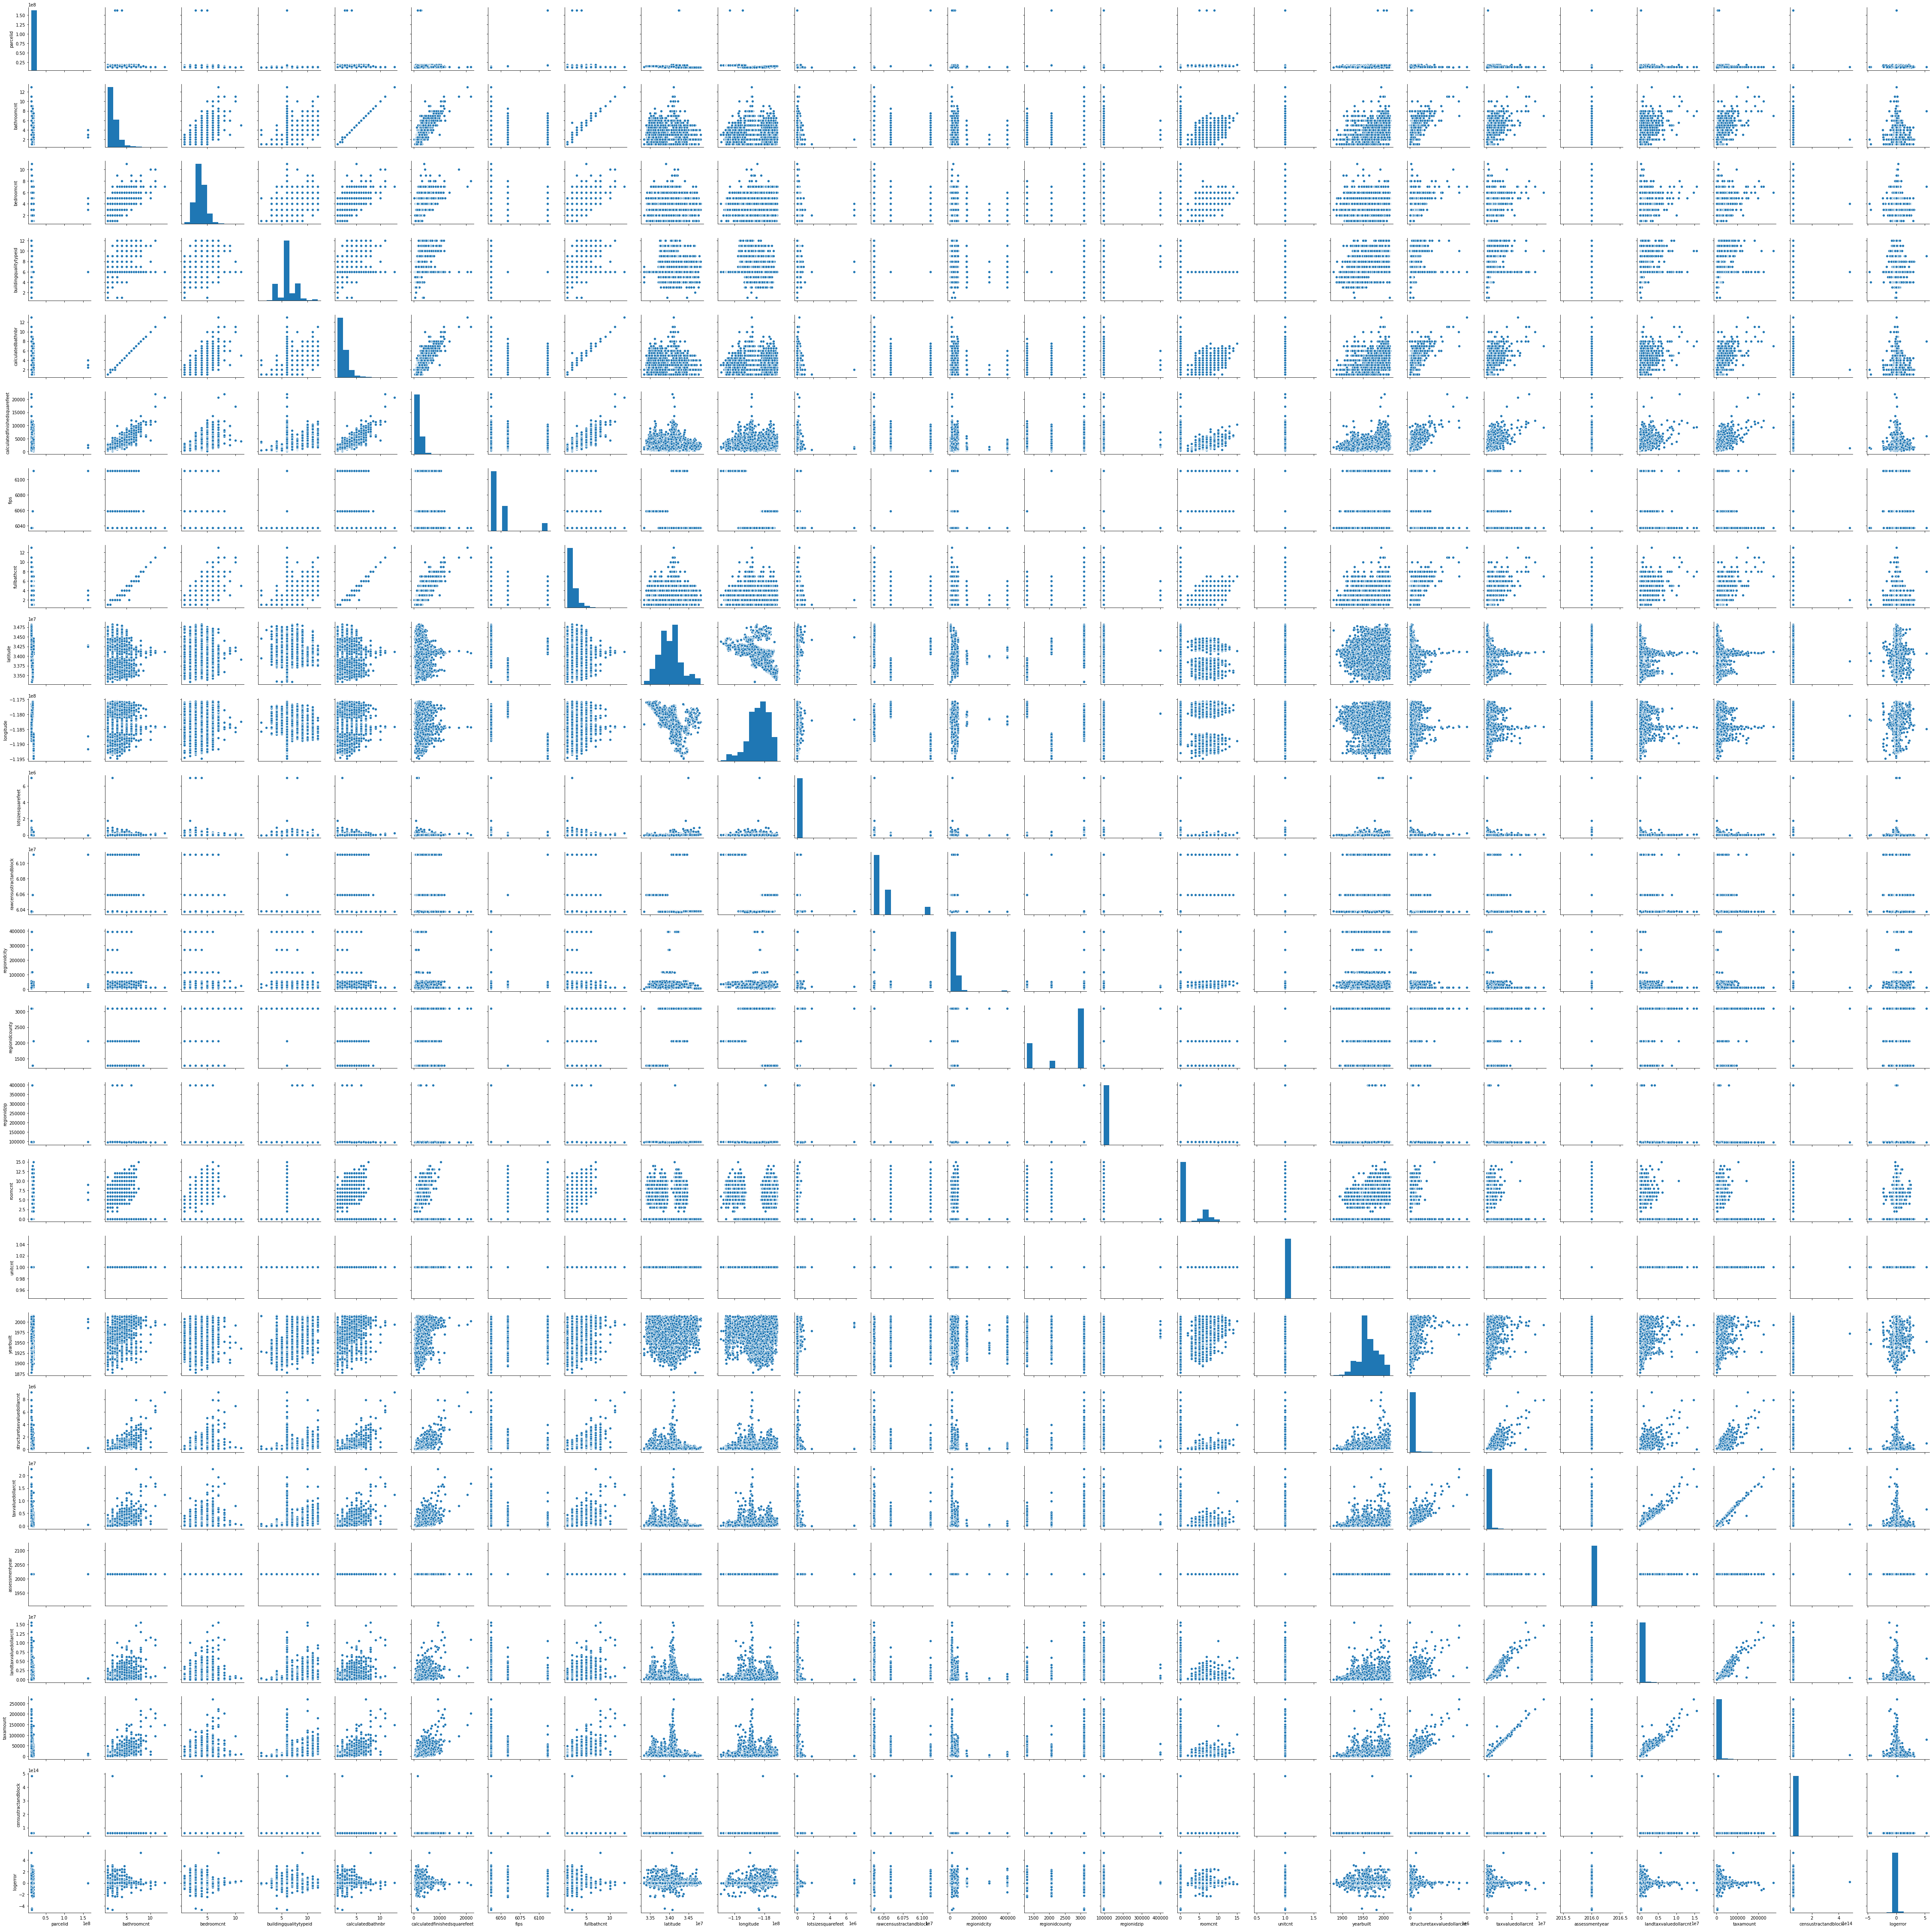

In [9]:
sns.pairplot(train)

#### 2. Plot a correlation matrix heatmap.

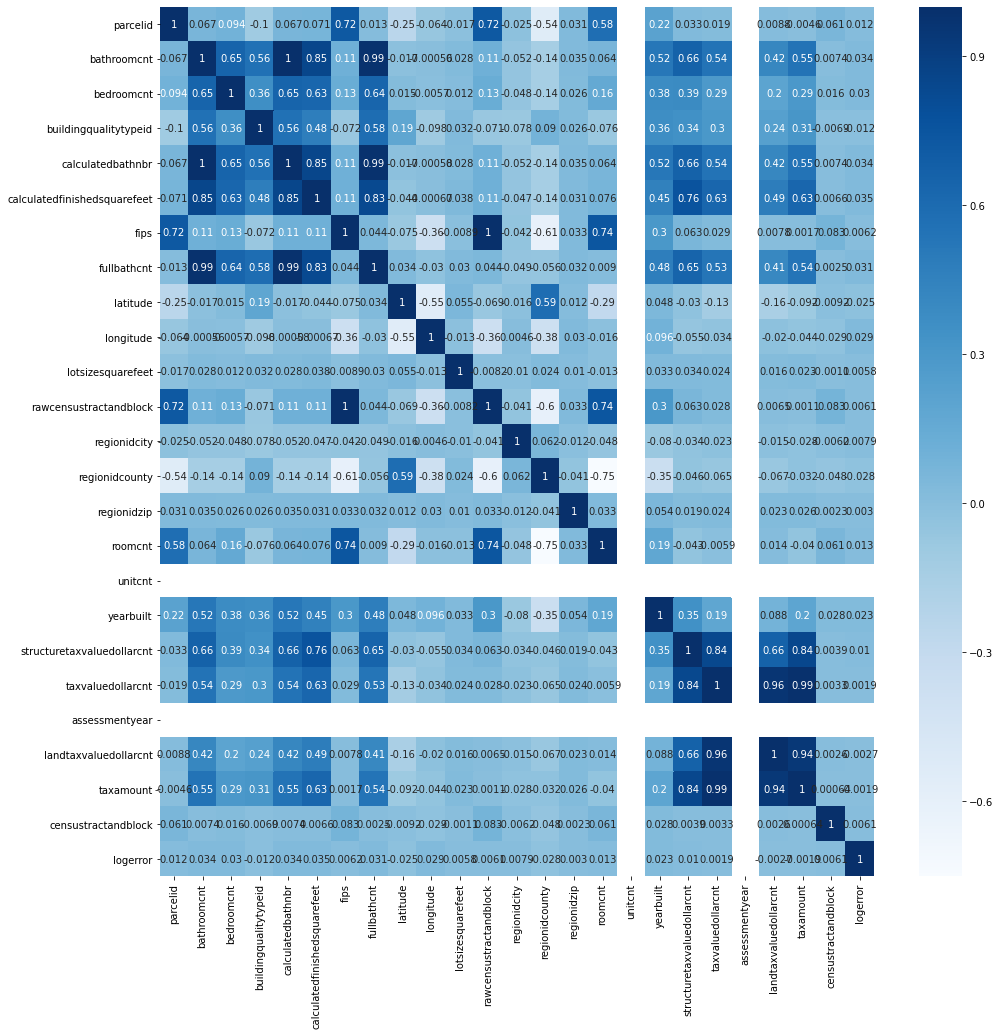

In [17]:
plt.figure(figsize=(16, 16))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.show()

#### 3. Plot latitude against longitude.

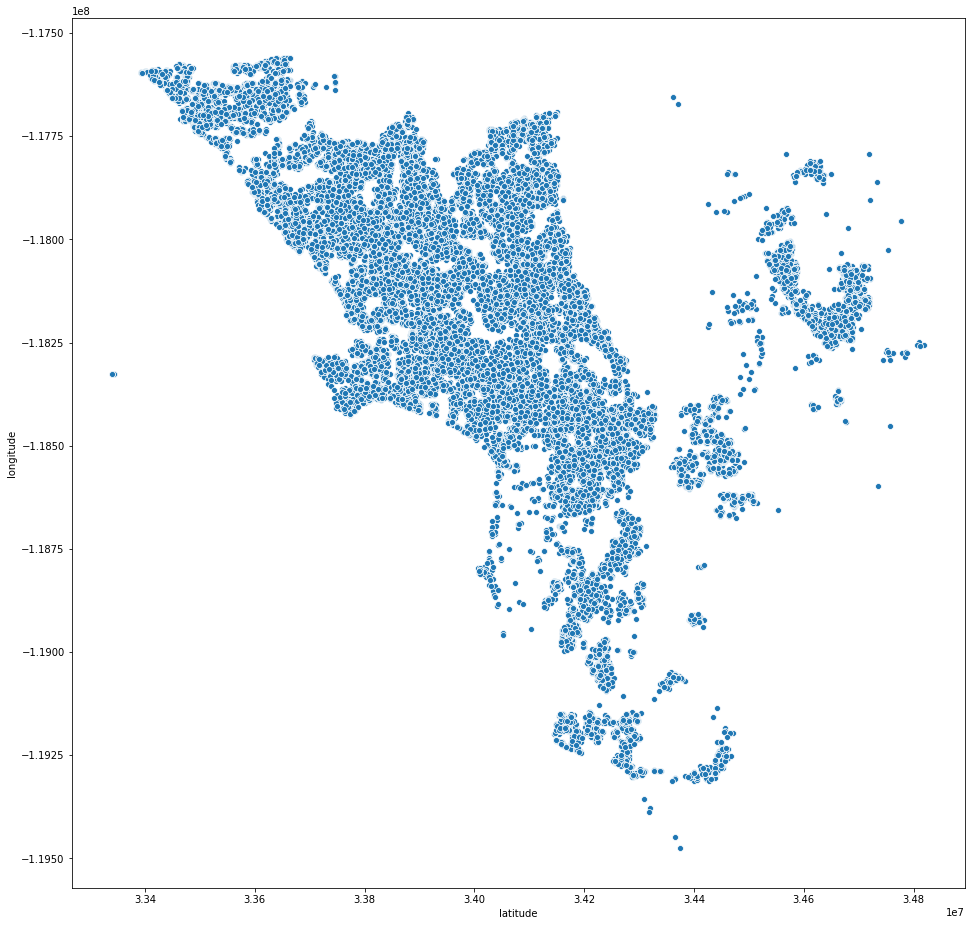

In [18]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=train.latitude, y=train.longitude)
plt.show()

> **Resembles like SoCal! Who woulda guessed?!**

#### 4. Create a useable plot with 4 dimensions, e.g. x, y, color, size.

#### 5. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

$H_0$: The mean logerror by zipcode is the same as the population's mean logerror

$H_a$: The mean logerror by zipcode is different than the population's mean logerror

In [28]:
alpha = .001

x = train[train.regionidzip == 96379.0].logerror
mu = train.logerror.mean()

tstat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {tstat}")
print(f"    p-value = {p}")

if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = 2.938326902565887
    p-value = 0.004201898895646971
Fail to reject null hypothesis


In [35]:
alpha = .001

mu = train.logerror.mean()

for zipcode in train.regionidzip.unique():
    x = train[train.regionidzip == zipcode].logerror
    tstat, p = stats.ttest_1samp(x, mu)
    if p < alpha:
        print("Reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is different than the population's 
        mean logerror.""")
        print()
    else:
        print("Fail to reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is the same as the population's 
        mean logerror""")
        print()

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96379.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96473.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97329.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97047.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96086.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96449.0 is the same as the population's 
        mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96940.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96101.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96398.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96181.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96103.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96268.0 is the same as the population's 
        mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96203.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96161.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96338.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96989.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96018.0 is the same as the population's 
        mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96515.0 is the same as the population's 
        mean lo